![EPFL Center for Imaging logo](https://imaging.epfl.ch/resources/logo-for-gitlab.svg)
# Imaging Lunch: Introduction to Python for Image Analysis

This notebook introduces the basics of image handling and manipulation in Python, using [Scikit-image](https://scikit-image.org/), [Matplotlib](https://matplotlib.org/stable/), and [Numpy](https://numpy.org/).

➡️ Git repository: https://github.com/EPFL-Center-for-Imaging/ImagingLunch_ImagesInPython

## Why use Python for image analysis?

- ✅ Easy to learn and use
- ✅ Free & open-source
- ✅ Wide range of libraries
- ✅ Implement custom functions & tools
- ✅ Automate image analysis via scripts
- ✅ Deep learning & data science
- ✅ Explore data in Juptyer notebooks

## Overview

- [Opening our first image](#opening-our-first-image)
- [How are digital images represented in Python?](#how-are-digital-images-represented-in-python)
- [Selecting and modifying pixel values](#selecting-and-modifying-pixel-values)
- [Opening images from files](#opening-images-from-files)
- [Applying image processing filters](#applying-image-processing-filters)
- [Thresholding](#thresholding)
- [Segmenting individual objects](#segmenting-individual-objects)

```{admonition} How to use this notebook?
This Jupyter notebook is meant to be read and executed from top to bottom. Press `Shift`+`Enter` to run individual code cells.
```

## Packages

We'll use the packages listed in the requirements file ([requirements.txt](./requirements.txt)). To make sure you have installed these packages, you can run the Jupyter "magic" command below:

In [ ]:
# %pip install -qr requirements.txt

## Imports

We start by importing the `data` module from Scikit-image, which provides example images, and Matplotlib's `pyplot` module which we'll use to display images.

In [57]:
from skimage import data
import matplotlib.pyplot as plt

## Opening our first image

Let's load an example image provided by Scikit-image's `data` module. We'll display it using Matplotlib's `imshow` function.

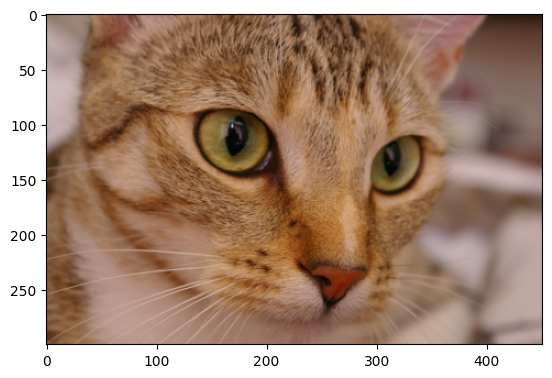

In [2]:
image = data.chelsea()

plt.imshow(image);

## How are digital images represented in Python?

Let's print `type` of our image variable.

In [54]:
print(type(image))

<class 'numpy.ndarray'>


We've managed to read the image into a **Numpy array**. Numpy arrays sit at the foundation of the scientific Python ecosystem, and are also the most common way of representing images in Python.

In [ ]:
print(image)  # Necessary?

[[ 40  32  24 ... 216 200 200]
 [ 56  40  24 ... 232 216 216]
 [ 64  48  24 ... 240 232 232]
 ...
 [ 72  80  80 ...  48  48  48]
 [ 80  80  80 ...  48  48  48]
 [ 96  88  80 ...  48  48  48]]


Now that we have loaded an image as a Numpy array, we can inspect the array's **attributes**, such as its `shape`, which gives us the size of the pixel grid:

In [4]:
image.shape

(300, 451, 3)

In this case, we have loaded an image of 300 by 451 pixels, that also contains three color channels (RGB).

Next, we can examine the `dtype` attribute, which tells us what kind of numbers are stored in the image array:

In [5]:
image.dtype

dtype('uint8')

Common types include **integers** such as 8-bit unsigned (`uint8`) used to store integer values between 0 and 255. There are also **floating-point** types (`float32`, `float64`) that store arrays of decimal numbers. Arrays encoded in a higher number of bits (32, 64) take up more space in memory, but allow to store larger numbers and to perform certain computations with more precision.

## Selecting and modifying pixel values

Since images are just Numpy arrays, we can apply any array operations to them. To select a subset of pixels in a region of interest in the image, we can use Numpy **indexing** along each axis, using the syntax `a[start:stop:step]`

In the example below, we "crop" the image along X and Y using this technique:

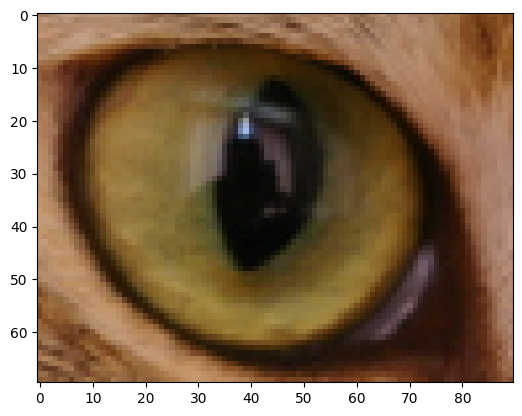

In [6]:
crop = image[80:150, 130:220]

plt.imshow(crop);

Similarly, we can select and change pixel values in our image. For example:

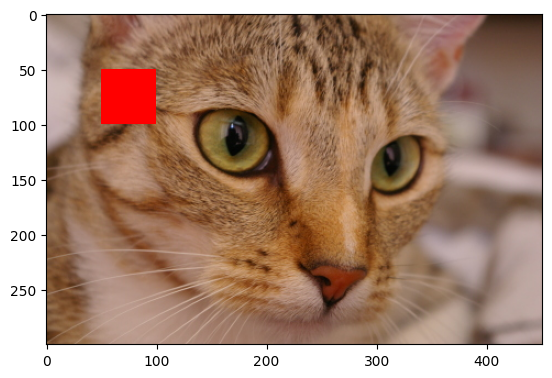

In [7]:
image[50:100, 50:100] = [255, 0, 0]

plt.imshow(image);

```{note} Image coordinates
The origin of the image coordinates is in the top-left corner of the image. To remember this, we can imagine the image as a table of values, where the first axis corresponds to rows and the second axis to columns of pixels.

![coordinates](./images/coordinate-systems.png)

Image ref: [link]()

```

## Opening images from files

To work with a real scientific image in Python, the first step is usually to open it from a file and load the image data into memory as a Numpy array.

To do this, we need to use a library that can recognize the file format that we are dealing with. For common file formats (e.g. TIFF) we can use the `imread` function from Scikit-image. To open certain specific formats (e.g. microscopy or astronomy data formats), we may need to install and use dedicated libraries.

| Files             | Examples                        | Library |
|-------------------|---------------------------------| ------ |
| Common formats | `.tif`, `.png`, `.jpg` | `scikit-image`, `Pillow`, `tifffile`, `OpenCV` |
| Biological formats  |  `.czi`, `.lif`, `.ome.tiff` | `bioio` |
| Specific formats  | `.mrc`, `.hdf5`, `.fits` | `mrcfile`, `h5py`, `fitsio` |

Image shape:  (254, 256)
Min value:  8
Max value:  248


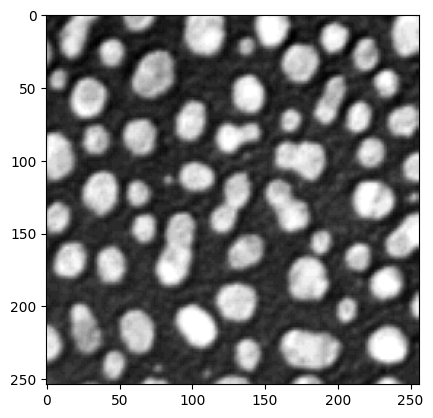

In [89]:
import skimage.io

image = skimage.io.imread("blobs.tif")

plt.imshow(image);

print("Image shape: ", image.shape)
print("Min value: ", image.min())
print("Max value: ", image.max())

Just like before, we have loaded the image into a Numpy array. However, it is no longer a RGB-coloured image: the shape is now (254, 256), representing a 2D grayscale image.

By default, Matplotlib uses the `viridis` **colormap** (=lookup table) to display images. If we want to change that, we can specify a value for the `cmap` parameter of the `imshow` function.

Below, we create a `Figure` object with three subplots and show the image using different colormaps.

Possible values of "cmap": https://matplotlib.org/stable/users/explain/colors/colormaps.html

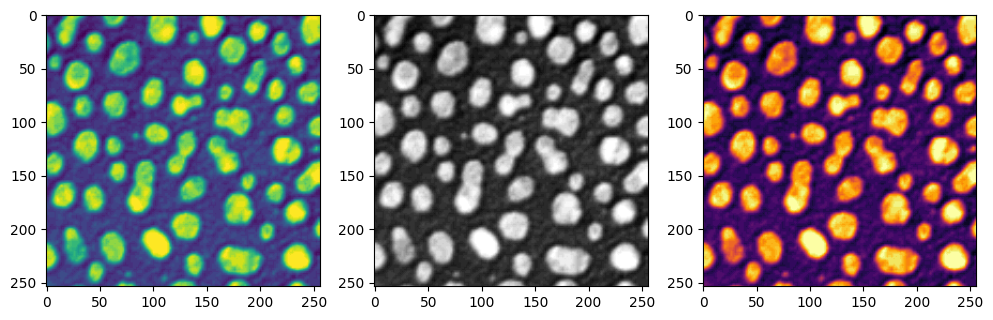

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 6), ncols=3)
ax1.imshow(image, cmap="viridis")
ax2.imshow(image, cmap="gray")
ax3.imshow(image, cmap="inferno")
plt.show()

```{admonition} Reminder
**Colormaps**, also known as lookup tables (LUTs), map pixel values to colors:
![colormaps](https://healthbioscienceideas.github.io/microscopy-novice/fig/same-array-diff-display.png)
```

In [80]:
import matplotlib

matplotlib.rc("image", cmap="gray")

In our final plot, we add a color bar to display the actual values of the pixels, and set the minimum and maximum values of the colorbar with the `vmin` and `vmax` parameters.

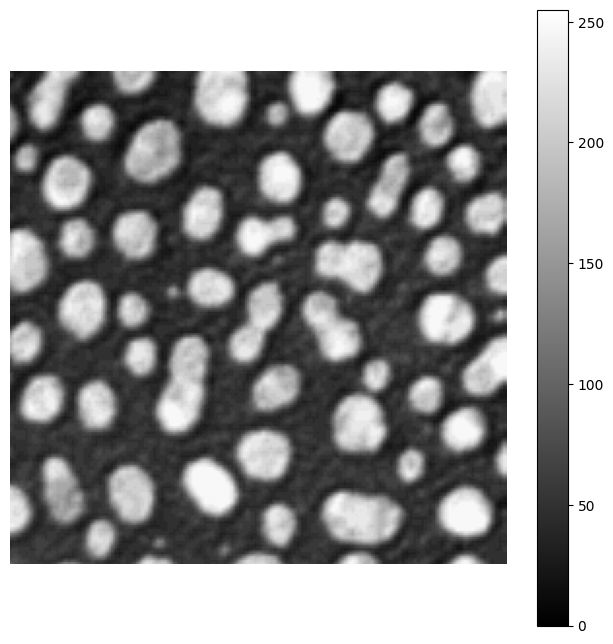

In [ ]:
# %matplotlib widget

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(image, vmin=0, vmax=255)
ax.set_axis_off()  # Hide the axes
fig.colorbar(im, ax=ax)
plt.show()

**Going further (optional)**

Matplotlib is suitable for many simple visualization cases, however alternatives exist: [Plotly](), [Napari](), [stackview]().

For example, `stackview`'s `insight` function ([docs](https://github.com/haesleinhuepf/stackview)) lets you easily display the image along with its histogram and important attributes in one line of code:

In [1]:
# import stackview

# stackview.insight(image)

## Applying image processing filters

Image processing...

Preprocessing filters often include:

- Applying denoising filters (median, Gaussian...)
- Subtracting the background illumination
- Normalizing or rescaling the image intensity values

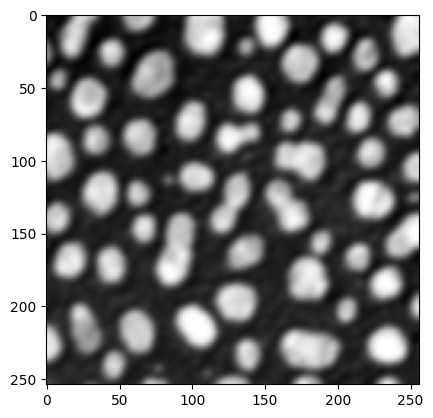

In [ ]:
from skimage.filters import gaussian

blurred_img = gaussian(image, sigma=2)

plt.imshow(blurred_img);

````{admonition} Where to find documentation?
To find docs...

```
help(gaussian)
```
Examples on how to use
````

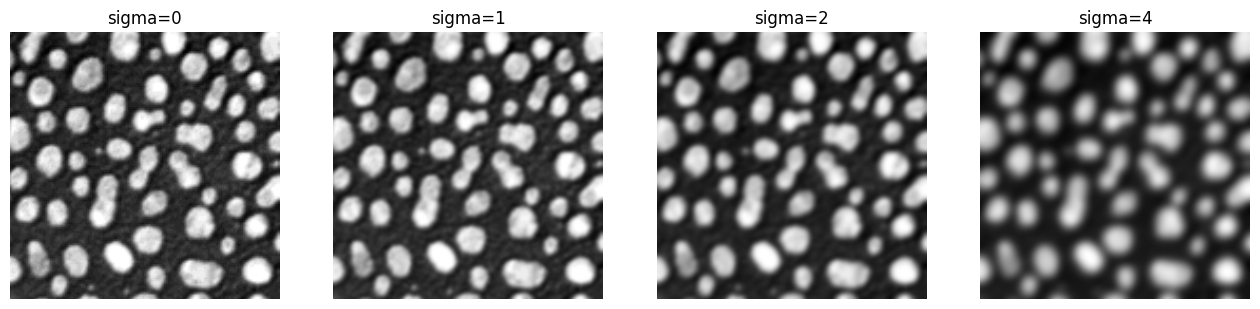

In [ ]:
sigmas = [0, 1, 2, 4]

n_sigmas = len(sigmas)

fig, axes = plt.subplots(figsize=(16, 4), ncols=n_sigmas)
for sigma, ax in zip(sigmas, axes):
    blurred_img = gaussian(image, sigma=sigma)
    ax.set_title(f"{sigma=}")
    ax.set_axis_off()
    ax.imshow(blurred_img)
plt.show()

## Thresholding

Intensity thresholding is utterly common in image analysis, as it is the basis for identifying objects based on how their intensity differs from the background. This process, known as a binary segmentation of the image is used to locate, count, or study the size and shape of structures or objects.

To figure out which threshold to apply, let's take a look at the intensity histogram of our image.

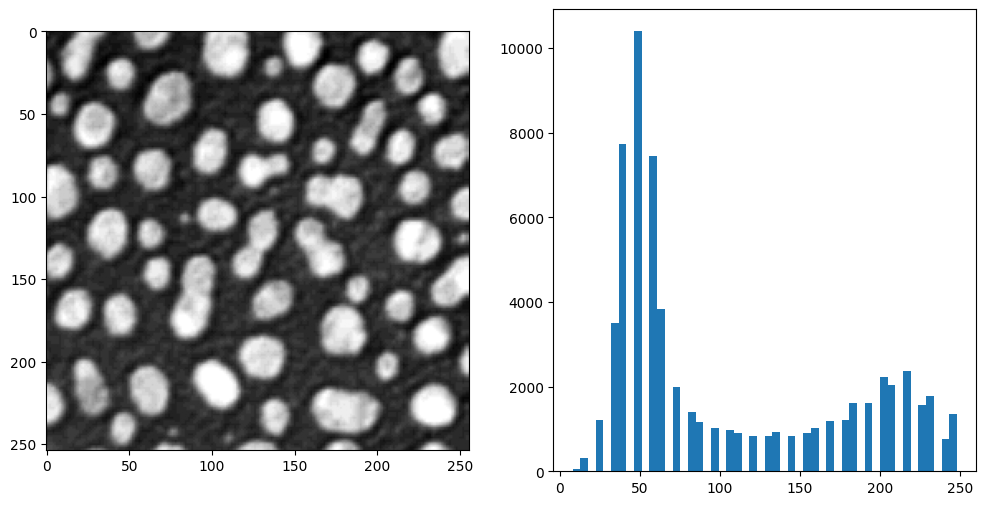

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), ncols=2)
ax1.imshow(image)
ax2.hist(image.flatten(), bins=50)
plt.show()

With Numpy, we can effectively create a **boolean mask** from the image array, where pixels that satisfy a given condition are set to `True` and other pixels to `False`.

For the thresholding case, this technique consists in selecting all pixels above a given value:

In [33]:
filt = image > 120

filt

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(254, 256))

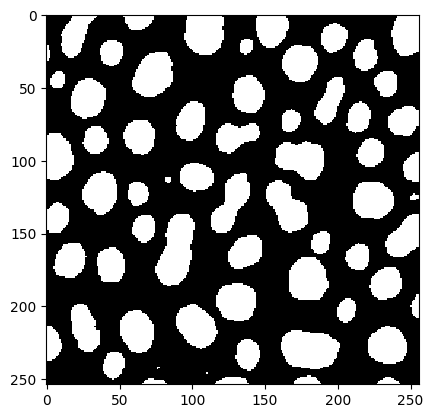

In [ ]:
plt.imshow(filt, interpolation="none");

In [35]:
area_fract = filt.sum() / filt.size

print("Fraction of `True` pixels: ", area_fract)

Fraction of `True` pixels:  0.3420736958661417


There are automatic methods to find a good guess of threshold value.

![otsu](https://upload.wikimedia.org/wikipedia/commons/3/34/Otsu%27s_Method_Visualization.gif)

In [ ]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(image)

print("Otsu's threshold: ", thresh)

Otsu's threshold:  120


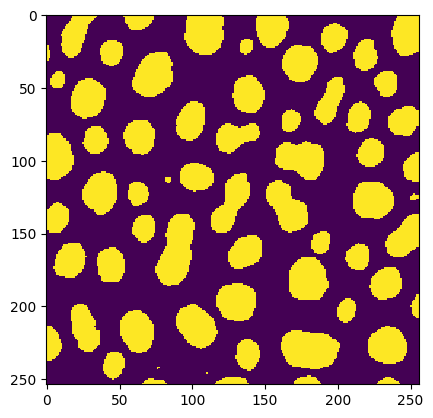

In [ ]:
binary_img = image > thresh

plt.imshow(binary_img, interpolation="none");

## Segmenting individual objects

From our binary, thresholded image, we can apply an algorithm known as **connected components labeling**. The algorithms identifies disconnected groups of pixels and assigns a different *label* value to each of them.

In a "labeled" image array, values respresent object instances.

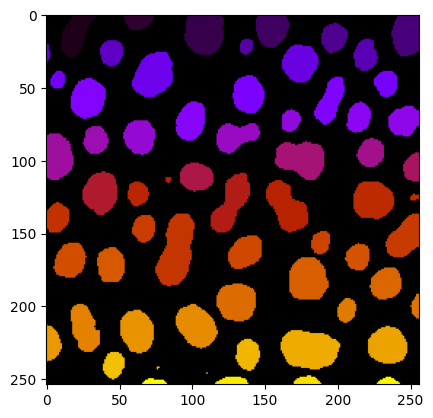

In [86]:
from skimage.measure import label

label_img = label(binary_img)

plt.imshow(label_img, cmap="gnuplot");


Working with a labeled array lets us select pixels belonging to only a single object. 

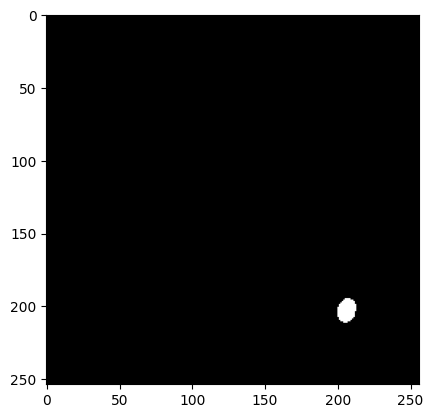

In [87]:
object_idx = 50

selected_object = label_img == object_idx

plt.imshow(selected_object);

Another way of selecting values in an image array is via **filtering**, by applying the boolean mask to the original image to seletc pixels inside the mask (where values are `True`).

In [76]:
object_pixels = image[selected_object]

object_pixels.shape

(170,)

In [ ]:
print(f"Mean intensity in object {object_idx}: ", object_pixels.mean())

Finally, Scikit-image gives us functions to measure common object properties for all objects in a labeled image. We can return the results in a table format, such as a Pandas DataFrame.

In [73]:
import pandas as pd
from skimage.measure import regionprops_table

measurements = pd.DataFrame(regionprops_table(label_img, properties=["label", "area", "eccentricity", "centroid"]))

measurements

,label,area,eccentricity,centroid-0,centroid-1
0,1,433.0,0.876649,13.212471,19.986143
1,2,185.0,0.828189,4.270270,62.945946
2,3,658.0,0.352060,12.568389,108.329787
3,4,434.0,0.341084,9.806452,154.520737
4,5,477.0,0.771328,13.545073,246.809224
...,...,...,...,...,...
59,60,1.0,0.000000,246.000000,110.000000
60,61,81.0,0.947745,251.135802,178.740741
61,62,90.0,0.971003,251.322222,127.600000
62,63,53.0,0.939695,251.566038,234.396226


## Conclusion

What have we achieved? We've coverted how to:

- Open images using `imread` and display them using `imshow`
- Image array attributes and operations: `shape`, `dtype`, `min()`, `max()`, etc.
- The basics of Numpy **indexing** (`image[10:20, 10:30]`) and **filtering** (`image > 50`) to select and modify pixels from an image array
- Image processing functions and
- Functions to generate and work with **binary**, and **labeled** segmentation masks
- How to get measurements out from images

🪧 Where to go next?

## Extra topics (free choice)

- Using the terminal, conda, and running Python scripts from the terminal

- Working with and visualizing 3D or multichannel images (projections, Z-stack concepts)

- Beyond Numpy: other "array" representations (dask, xarray, tensors...)

- Deep learning: where to get started? (scikit-learn, Pytorch, Keras)

- Visualization libraries (Napari, PyVista)
  
- Dealing with large images

- Creating functions and pipelines, packaging, and reusing code for automation

- Handling tasks other than segmentation (registration, denoising, tracking, etc.)

- Understanding error messages, debugging

- Finding and using documentation

## Going further

- Learn to install, set up, and work with Python on your system: [Setup instructions]()
- Scikit-image documentation: https://scikit-image.org/docs/stable/
- Numpy documentation: 
- Awesome Image Analysis (https://github.com/EPFL-Center-for-Imaging/awesome-scientific-image-analysis)